In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import utils
from utils import *
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

In [96]:
data=pd.read_csv('train_values.csv')
data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [97]:
label=pd.read_csv('train_labels.csv')
label.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [98]:
data['damage_grade']=label['damage_grade']

In [99]:
data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

In [100]:
data.shape

(260601, 40)

In [101]:
X_test = pd.read_csv('test_values.csv')

In [102]:
X_test['damage_grade'] = -1

In [103]:
X_test.shape

(86868, 40)

In [104]:
data_train = data.append(X_test, ignore_index=True, sort=False)

In [105]:
data_train.shape

(347469, 40)

In [106]:
data_train.describe().transpose()

count           mean  \
building_id                             347469.0  525913.583848   
geo_level_1_id                          347469.0      13.897315   
geo_level_2_id                          347469.0     701.838052   
geo_level_3_id                          347469.0    6258.846760   
count_floors_pre_eq                     347469.0       2.130579   
age                                     347469.0      26.538814   
area_percentage                         347469.0       8.017014   
height_percentage                       347469.0       5.434799   
has_superstructure_adobe_mud            347469.0       0.088972   
has_superstructure_mud_mortar_stone     347469.0       0.762077   
has_superstructure_stone_flag           347469.0       0.034366   
has_superstructure_cement_mortar_stone  347469.0       0.018318   
has_superstructure_mud_mortar_brick     347469.0       0.067980   
has_superstructure_cement_mortar_brick  347469.0       0.074910   
has_superstructure_timber               347469.0       0.254624   
has_superstructure_bamboo               347469.0       0.084678   
has_superstructure_rc_non_engineered    347469.0       0.042568   
has_superstructure_rc_engineered        347469.0       0.015843   
has_superstructure_other                347469.0       0.015040   
count_families                          347469.0       0.983740   
has_secondary_use                       347469.0       0.111777   
has_secondary_use_agriculture           347469.0       0.064308   
has_secondary_use_hotel                 347469.0       0.033686   
has_secondary_use_rental                347469.0       0.008136   
has_secondary_use_institution           347469.0       0.000958   
has_secondary_use_school                347469.0       0.000363   
has_secondary_use_industry              347469.0       0.001053   
has_secondary_use_health_post           347469.0       0.000167   
has_secondary_use_gov_office            347469.0       0.000138   
has_secondary_use_use_police            347469.0       0.000078   
has_secondary_use_other                 347469.0       0.005065   
damage_grade                            347469.0       1.428697   

                                                  std  min       25%  \
building_id                             304354.479088  4.0  261999.0   
geo_level_1_id                               8.032597  0.0       7.0   
geo_level_2_id                             412.875674  0.0     350.0   
geo_level_3_id                            3646.950564  0.0    3073.0   
count_floors_pre_eq                          0.727761  1.0       2.0   
age                                         73.527749  0.0      10.0   
area_percentage                              4.388646  1.0       5.0   
height_percentage                            1.915555  2.0       4.0   
has_superstructure_adobe_mud                 0.284704  0.0       0.0   
has_superstructure_mud_mortar_stone          0.425813  0.0       1.0   
has_superstructure_stone_flag                0.182167  0.0       0.0   
has_superstructure_cement_mortar_stone       0.134100  0.0       0.0   
has_superstructure_mud_mortar_brick          0.251712  0.0       0.0   
has_superstructure_cement_mortar_brick       0.263247  0.0       0.0   
has_superstructure_timber                    0.435650  0.0       0.0   
has_superstructure_bamboo                    0.278402  0.0       0.0   
has_superstructure_rc_non_engineered         0.201881  0.0       0.0   
has_superstructure_rc_engineered             0.124869  0.0       0.0   
has_superstructure_other                     0.121713  0.0       0.0   
count_families                               0.419385  0.0       1.0   
has_secondary_use                            0.315092  0.0       0.0   
has_secondary_use_agriculture                0.245301  0.0       0.0   
has_secondary_use_hotel                      0.180421  0.0       0.0   
has_secondary_use_rental                     0.089832  0.0       0.0   
has_secondary_use_institution  

In [111]:
datatemp = data_train.iloc[:, 28:39]

In [112]:
t0 = pd.DataFrame(datatemp[datatemp['has_secondary_use'] == 0])

In [113]:
t0.sum()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

In [13]:
del data_train['has_secondary_use']

In [14]:
data_train.shape

(347469, 39)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


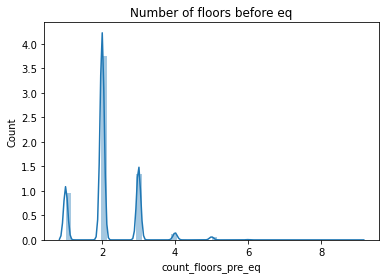

In [115]:
fig=sns.distplot(data_train['count_floors_pre_eq'])
plt.xlabel("count_floors_pre_eq")
plt.ylabel("Count")
plt.title("Number of floors before eq")
plt.show(fig)

In [116]:
data_train['count_floors_pre_eq'].describe()

count    347469.000000
mean          2.130579
std           0.727761
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

In [15]:
data_train[(data_train['count_floors_pre_eq'] > 3)]['count_floors_pre_eq'].count()

10564

In [117]:
data_train.loc[(data_train['count_floors_pre_eq'] > 3), 'count_floors_pre_eq'] = 3

In [118]:
data_train['count_floors_pre_eq'].value_counts()

2    209029
3     84735
1     53705
Name: count_floors_pre_eq, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


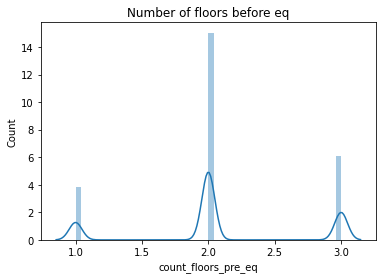

In [119]:
fig=sns.distplot(data_train['count_floors_pre_eq'])
plt.xlabel("count_floors_pre_eq")
plt.ylabel("Count")
plt.title("Number of floors before eq")
plt.show(fig)

In [18]:
def rm_outliers(df, var):
    FQ = df[var].quantile(.25)
    TQ = df[var].quantile(.75)
    iqr = TQ-FQ
    h = 3*iqr
    df.loc[df[var] > TQ+h, var] = TQ+h
    df.loc[df[var] < FQ-h, var] = FQ-h

<AxesSubplot:ylabel='Frequency'>

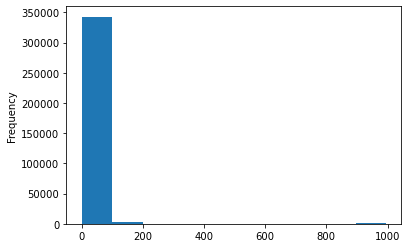

In [120]:
data_train['age'].plot(kind = 'hist')

In [121]:
rm_outliers(data_train, 'age')

<AxesSubplot:ylabel='Frequency'>

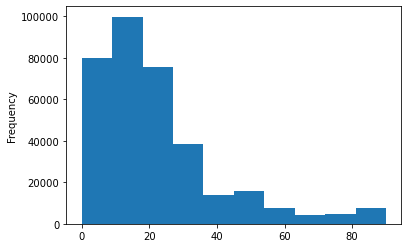

In [122]:
data_train['age'].plot(kind = 'hist')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


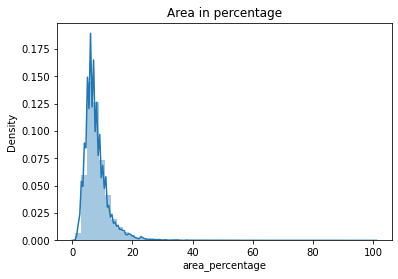

In [124]:
fig=sns.distplot(data_train['area_percentage'])
plt.title('Area in percentage')
plt.show(fig)

In [125]:
rm_outliers(data_train, 'area_percentage')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


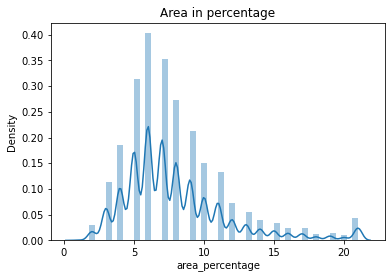

In [128]:
fig=sns.distplot(data_train['area_percentage'])
plt.title('Area in percentage')
plt.show(fig)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


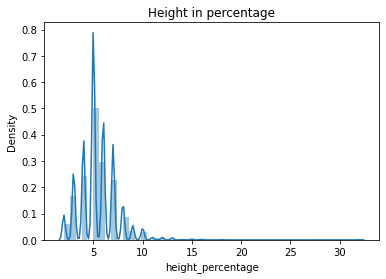

In [129]:
fig=sns.distplot(data_train['height_percentage'])
plt.title('Height in percentage')
plt.show(fig)

In [130]:
rm_outliers(data_train, 'height_percentage')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


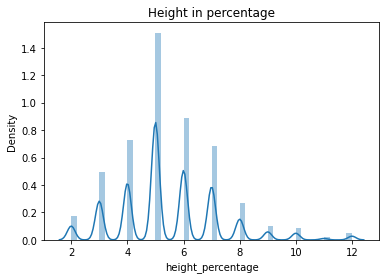

In [131]:
fig=sns.distplot(data_train['height_percentage'])
plt.title('Height in percentage')
plt.show(fig)

In [22]:
data_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq   age  area_percentage  height_percentage  \
0                    2  30.0              6.0                5.0   
1                    2  10.0              8.0                7.0   
2                    2  10.0              5.0                5.0   
3                    2  10.0              6.0                5.0   
4                    3  30.0              8.0                9.0   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               r  ...                       0   
1                      o               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 39 columns]

In [23]:
D1 = {}
D2 = {}
D3 = {}

for i,j in (data_train['geo_level_1_id'].value_counts()).iteritems():
    
    c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_1_id']==i])
    c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_1_id']==i])
    c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_1_id']==i])

    D1[i] = c1/j
    D2[i] = c2/j
    D3[i] = c3/j

<ipython-input-23-54b266f8937e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_1_id']==i])
<ipython-i

<ipython-input-23-54b266f8937e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_1_id']==i])
<ipython-input-23-54b266f8937e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_1_id']==i])
<ipython-i

In [24]:
list1 = []
list2 = []
list3 = []

for i in data_train['geo_level_1_id']:
    list1.append(D1.get(i))
    list2.append(D2.get(i))
    list3.append(D3.get(i))

data_train['prob1_geo1'] = list1
data_train['prob2_geo1'] = list2
data_train['prob3_geo1'] = list3

In [25]:
D1 = {}
D2 = {}
D3 = {}

for i,j in (data_train['geo_level_2_id'].value_counts()).iteritems():
    
    c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
    c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
    c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])

    D1[i] = c1/j
    D2[i] = c2/j
    D3[i] = c3/j

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-i

<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_2_id']==i])
<ipython-input-25-54b4d491e086>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_2_id']==i])
<ipython-i

In [26]:
list1 = []
list2 = []
list3 = []

for i in data_train['geo_level_2_id']:
    list1.append(D1.get(i))
    list2.append(D2.get(i))
    list3.append(D3.get(i))

data_train['prob1_geo2'] = list1
data_train['prob2_geo2'] = list2
data_train['prob3_geo2'] = list3

In [27]:
D1 = {}
D2 = {}
D3 = {}

for i,j in (data_train['geo_level_3_id'].value_counts()).iteritems():
    
    c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
    c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
    c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])

    D1[i] = c1/j
    D2[i] = c2/j
    D3[i] = c3/j

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-i

<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c2 = len(data_train[data_train['damage_grade']==2][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c3 = len(data_train[data_train['damage_grade']==3][data_train['geo_level_3_id']==i])
<ipython-input-27-eb474efe34ba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c1 = len(data_train[data_train['damage_grade']==1][data_train['geo_level_3_id']==i])
<ipython-i

In [28]:
list1 = []
list2 = []
list3 = []

for i in data_train['geo_level_3_id']:
    list1.append(D1.get(i))
    list2.append(D2.get(i))
    list3.append(D3.get(i))

data_train['prob1_geo3'] = list1
data_train['prob2_geo3'] = list2
data_train['prob3_geo3'] = list3

In [29]:
data_train.shape

(347469, 48)

In [30]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347469 entries, 0 to 347468
Data columns (total 48 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             347469 non-null  int64  
 1   geo_level_1_id                          347469 non-null  int64  
 2   geo_level_2_id                          347469 non-null  int64  
 3   geo_level_3_id                          347469 non-null  int64  
 4   count_floors_pre_eq                     347469 non-null  int64  
 5   age                                     347469 non-null  float64
 6   area_percentage                         347469 non-null  float64
 7   height_percentage                       347469 non-null  float64
 8   land_surface_condition                  347469 non-null  object 
 9   foundation_type                         347469 non-null  object 
 10  roof_type                               3474

In [31]:
categorical_columns = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
data_train = pd.get_dummies(data_train, prefix_sep = '_', columns = categorical_columns, drop_first=False)

In [32]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347469 entries, 0 to 347468
Data columns (total 78 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             347469 non-null  int64  
 1   geo_level_1_id                          347469 non-null  int64  
 2   geo_level_2_id                          347469 non-null  int64  
 3   geo_level_3_id                          347469 non-null  int64  
 4   count_floors_pre_eq                     347469 non-null  int64  
 5   age                                     347469 non-null  float64
 6   area_percentage                         347469 non-null  float64
 7   height_percentage                       347469 non-null  float64
 8   has_superstructure_adobe_mud            347469 non-null  int64  
 9   has_superstructure_mud_mortar_stone     347469 non-null  int64  
 10  has_superstructure_stone_flag           3474

In [33]:
data_train['volume_percentage']=data_train['area_percentage']* data_train['height_percentage']
data_train['CntFloorAge'] = data_train['count_floors_pre_eq']/(data_train['age']+0.1)
data_train['CntFloorsArea'] = data_train['count_floors_pre_eq']/data_train['area_percentage']
data_train['CntFloorsHeight'] = data_train['count_floors_pre_eq']/data_train['height_percentage']
data_train['AreaPerAge'] = data_train['area_percentage']/(data_train['age']+0.1)
data_train['HeightPerAge'] = data_train['height_percentage']/(data_train['age']+0.1)
data_train['AreaPerHeight'] = data_train['area_percentage']/data_train['height_percentage']
data_train['CntFamFloors'] = data_train['count_families']/data_train['count_floors_pre_eq']
data_train['CntFamArea'] = data_train['count_families']/data_train['area_percentage']
data_train['CntFamHeight'] = data_train['count_families']/data_train['height_percentage']

In [34]:
train_target_data = data_train[(data_train['damage_grade'] != -1)]
test_data = data_train[(data_train['damage_grade'] == -1)]

<AxesSubplot:>

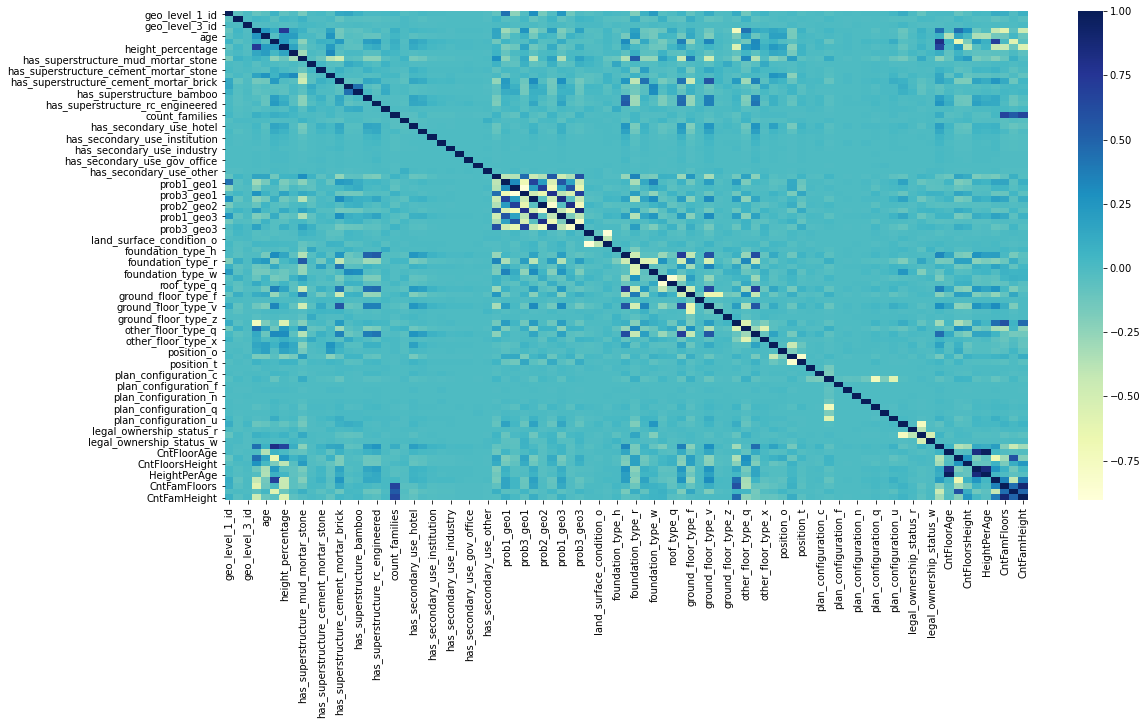

In [136]:
plt.figure(figsize=(18,9))
sns.heatmap(train_target_data.corr(),annot=False, fmt=".2f", cmap='YlGnBu')

<AxesSubplot:>

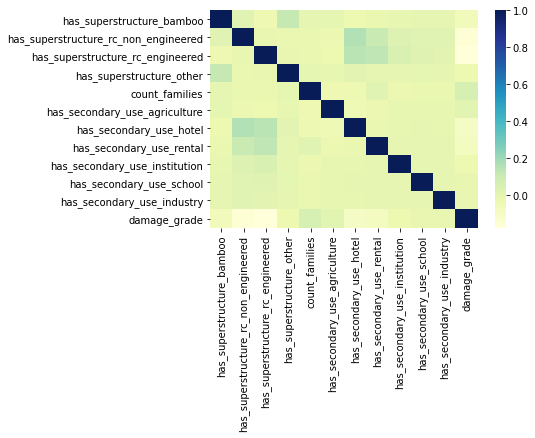

In [140]:
superstructureCol = []
for i in range(14,25):
    superstructureCol.append(train_target_data.columns[i])

corr = train_target_data[superstructureCol+['damage_grade']].corr()
sns.heatmap(corr, cmap='YlGnBu')

<AxesSubplot:>

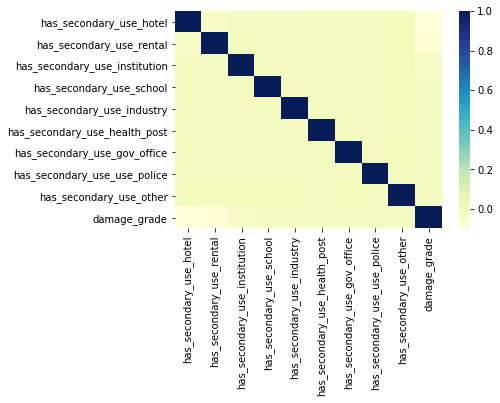

In [142]:
secondaryUse = []
for i in range(20,29):
    secondaryUse.append(train_target_data.columns[i])

corr = train_target_data[secondaryUse+['damage_grade']].corr()
sns.heatmap(corr,cmap='YlGnBu')

In [35]:
train_target_data.shape

(260601, 88)

In [150]:
data_train[(data_train['land_surface_condition'] == 't') &
(data_train['foundation_type'] == 'r') &
(data_train['roof_type'] == 'n') &
(data_train['ground_floor_type'] == 'f') &
(data_train['other_floor_type'] == 'q') &
(data_train['position'] == 's') &
(data_train['plan_configuration'] == 'd')].count()

building_id                               85665
geo_level_1_id                            85665
geo_level_2_id                            85665
geo_level_3_id                            85665
count_floors_pre_eq                       85665
age                                       85665
area_percentage                           85665
height_percentage                         85665
land_surface_condition                    85665
foundation_type                           85665
roof_type                                 85665
ground_floor_type                         85665
other_floor_type                          85665
position                                  85665
plan_configuration                        85665
has_superstructure_adobe_mud              85665
has_superstructure_mud_mortar_stone       85665
has_superstructure_stone_flag             85665
has_superstructure_cement_mortar_stone    85665
has_superstructure_mud_mortar_brick       85665
has_superstructure_cement_mortar_brick  

In [36]:
del test_data['damage_grade']

In [37]:
test_data.shape

(86868, 87)

In [38]:
test_data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260601       300051              17             596           11307   
260602        99355               6             141           11987   
260603       890251              22              19           10044   
260604       745817              26              39             633   
260605       421793              17             289            7970   

        count_floors_pre_eq   age  area_percentage  height_percentage  \
260601                    3  20.0              7.0                6.0   
260602                    2  25.0             13.0                5.0   
260603                    2   5.0              4.0                5.0   
260604                    1   0.0             19.0                3.0   
260605                    3  15.0              8.0                7.0   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
260601                             0                                    1   
260602                             0                                    1   
260603                             0                                    1   
260604                             0                                    0   
260605                             0                                    1   

        ...  volume_percentage  CntFloorAge  CntFloorsArea  CntFloorsHeight  \
260601  ...               42.0     0.149254       0.428571         0.500000   
260602  ...               65.0     0.079681       0.153846         0.400000   
260603  ...               20.0     0.392157       0.500000         0.400000   
260604  ...               57.0    10.000000       0.052632         0.333333   
260605  ...               56.0     0.198675       0.375000         0.428571   

        AreaPerAge  HeightPerAge  AreaPerHeight  CntFamFloors  CntFamArea  \
260601    0.348259      0.298507       1.166667      0.333333    0.142857   
260602    0.517928      0.199203       2.600000      0.500000    0.076923   
260603    0.784314      0.980392       0.800000      0.500000    0.250000   
260604  190.000000     30.000000       6.333333      2.000000    0.105263   
260605    0.529801      0.463576       1.142857      0.333333    0.125000   

        CntFamHeight  
260601      0.166667  
260602      0.200000  
260603      0.200000  
260604      0.666667  
260605      0.142857  

[5 rows x 87 columns]

In [39]:
train_target_data.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq   age  area_percentage  height_percentage  \
0                    2  30.0              6.0                5.0   
1                    2  10.0              8.0                7.0   
2                    2  10.0              5.0                5.0   
3                    2  10.0              6.0                5.0   
4                    3  30.0              8.0                9.0   

   has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  ...  \
0                             1                                    1  ...   
1                             0                                    1  ...   
2                             0                                    1  ...   
3                             0                                    1  ...   
4                             1                                    0  ...   

   volume_percentage  CntFloorAge  CntFloorsArea  CntFloorsHeight  AreaPerAge  \
0               30.0     0.066445       0.333333         0.400000    0.199336   
1               56.0     0.198020       0.250000         0.285714    0.792079   
2               25.0     0.198020       0.400000         0.400000    0.495050   
3               30.0     0.198020       0.333333         0.400000    0.594059   
4               72.0     0.099668       0.375000         0.333333    0.265781   

   HeightPerAge  AreaPerHeight  CntFamFloors  CntFamArea  CntFamHeight  
0      0.166113       1.200000      0.500000    0.166667      0.200000  
1      0.693069       1.142857      0.500000    0.125000      0.142857  
2      0.495050       1.000000      0.500000    0.200000      0.200000  
3      0.495050       1.200000      0.500000    0.166667      0.200000  
4      0.299003       0.888889      0.333333    0.125000      0.111111  

[5 rows x 88 columns]

In [40]:
train_target_data.drop(columns='building_id', axis='columns', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
train_target_data.head()

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq   age  \
0               6             487           12198                    2  30.0   
1               8             900            2812                    2  10.0   
2              21             363            8973                    2  10.0   
3              22             418           10694                    2  10.0   
4              11             131            1488                    3  30.0   

   area_percentage  height_percentage  has_superstructure_adobe_mud  \
0              6.0                5.0                             1   
1              8.0                7.0                             0   
2              5.0                5.0                             0   
3              6.0                5.0                             0   
4              8.0                9.0                             1   

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  ...  \
0                                    1                              0  ...   
1                                    1                              0  ...   
2                                    1                              0  ...   
3                                    1                              0  ...   
4                                    0                              0  ...   

   volume_percentage  CntFloorAge  CntFloorsArea  CntFloorsHeight  AreaPerAge  \
0               30.0     0.066445       0.333333         0.400000    0.199336   
1               56.0     0.198020       0.250000         0.285714    0.792079   
2               25.0     0.198020       0.400000         0.400000    0.495050   
3               30.0     0.198020       0.333333         0.400000    0.594059   
4               72.0     0.099668       0.375000         0.333333    0.265781   

   HeightPerAge  AreaPerHeight  CntFamFloors  CntFamArea  CntFamHeight  
0      0.166113       1.200000      0.500000    0.166667      0.200000  
1      0.693069       1.142857      0.500000    0.125000      0.142857  
2      0.495050       1.000000      0.500000    0.200000      0.200000  
3      0.495050       1.200000      0.500000    0.166667      0.200000  
4      0.299003       0.888889      0.333333    0.125000      0.111111  

[5 rows x 87 columns]

In [42]:
train_target_data.describe().transpose()

count         mean          std       min  \
geo_level_1_id       260601.0    13.900353     8.033617  0.000000   
geo_level_2_id       260601.0   701.074685   412.710734  0.000000   
geo_level_3_id       260601.0  6257.876148  3646.369645  0.000000   
count_floors_pre_eq  260601.0     2.088626     0.625412  1.000000   
age                  260601.0    21.514442    19.268494  0.000000   
...                       ...          ...          ...       ...   
HeightPerAge         260601.0     5.241824    15.802215  0.022198   
AreaPerHeight        260601.0     1.595962     0.939023  0.083333   
CntFamFloors         260601.0     0.521725     0.290443  0.000000   
CntFamArea           260601.0     0.150120     0.093597  0.000000   
CntFamHeight         260601.0     0.202842     0.112687  0.000000   

                             25%          50%          75%      max  
geo_level_1_id          7.000000    12.000000    21.000000     30.0  
geo_level_2_id        350.000000   702.000000  1050.000000   1427.0  
geo_level_3_id       3073.000000  6270.000000  9412.000000  12567.0  
count_floors_pre_eq     2.000000     2.000000     2.000000      3.0  
age                    10.000000    15.000000    30.000000     90.0  
...                          ...          ...          ...      ...  
HeightPerAge            0.179641     0.298507     0.594059    120.0  
AreaPerHeight           1.000000     1.400000     1.857143     10.5  
CntFamFloors            0.333333     0.500000     0.500000      9.0  
CntFamArea              0.100000     0.142857     0.200000      2.5  
CntFamHeight            0.142857     0.200000     0.250000      3.5  

[87 rows x 8 columns]

In [43]:
X = train_target_data.loc[:, train_target_data.columns != 'damage_grade']
y = train_target_data.loc[:, train_target_data.columns == 'damage_grade']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 35)

In [45]:
X_test.shape

(26061, 86)

In [46]:
clf=XGBClassifier(n_jobs=-1,n_estimators= 600, max_depth= 10,learning_rate= 0.1)

In [47]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[01:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
y_pred = clf.predict(X_test)

In [148]:
score = f1_score(y_test, y_pred, average='micro')
print(f'{score:.4f}')

0.7427


In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.58      0.66      0.62      2208
           2       0.82      0.76      0.79     15924
           3       0.66      0.74      0.70      7929

    accuracy                           0.74     26061
   macro avg       0.69      0.72      0.70     26061
weighted avg       0.75      0.74      0.75     26061



In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 1454,   671,    83],
       [  980, 12068,  2876],
       [   73,  2023,  5833]], dtype=int64)

In [50]:
prediction = clf.predict(test_data.drop(columns='building_id'))

In [51]:
result=pd.DataFrame(prediction)
result['building_id']=test_data['building_id']
result.rename(columns={0:'damage_grade'},inplace=True)
result=result[['building_id','damage_grade']]
result.head()

building_id  damage_grade
0          NaN             3
1          NaN             2
2          NaN             3
3          NaN             1
4          NaN             3

In [52]:
result.to_csv('result.csv',index=False)

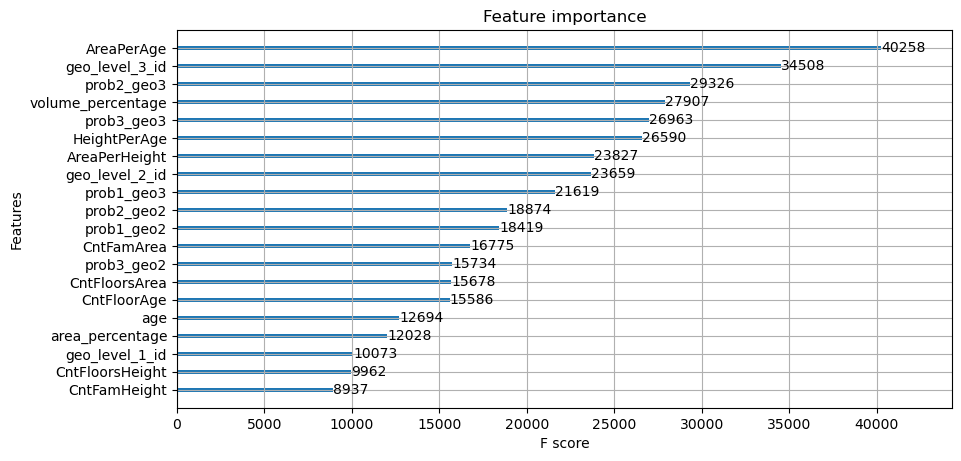

In [75]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1,figsize=(10,5), dpi=100)
ax = plot_importance(clf, max_num_features=20, ax=ax)

In [76]:
ax.figure.savefig('xgboost.png', figsize=(10, 5), dpi=1000)

<ipython-input-76-d5d5af81c2d4>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  ax.figure.savefig('xgboost.png', figsize=(10, 5), dpi=1000)


In [53]:
clf2 = RandomForestClassifier(n_estimators=750, max_features=25,random_state=0, n_jobs=-1)

In [54]:
clf2.fit(X_train, y_train)

<ipython-input-54-3ee1fd4128bb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train, y_train)


RandomForestClassifier(max_features=25, n_estimators=750, n_jobs=-1,
                       random_state=0)

In [55]:
y_pred = clf2.predict(X_test)

In [56]:
score = f1_score(y_test, y_pred, average='micro')
print(f'{score:.4f}')

0.7427


In [57]:
prediction = clf2.predict(test_data.drop(columns='building_id'))

In [58]:
result=pd.DataFrame(prediction)
result['building_id']=test_data['building_id']
result.rename(columns={0:'damage_grade'},inplace=True)
result=result[['building_id','damage_grade']]
result.head()

building_id  damage_grade
0          NaN             3
1          NaN             2
2          NaN             3
3          NaN             1
4          NaN             3

In [59]:
result.to_csv('result.csv',index=False)